In [1]:
import numpy as np
import scipy.io
import seaborn as sns
from scipy import stats, optimize, interpolate
import pandas as pd
from collections import defaultdict 
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
from scipy import stats
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import os, fnmatch



In [2]:
## published data in the cellmap.org 2016 
data_fitness_sga=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\SGA-Boone-LAB\Data File S1. Raw genetic interaction datasets_ Pair-wise interaction format\Data-fitness.xlsx',header=0,sheet_name='NxN')

data_fitness_sga.columns=['query-strain','query-allele-name','array-strain','array-allele-name','array-type','score','p-value','query-fitness','array-fitness','double-fitness','double-fitness-std']

## data saved from the df dataframe of statistics_per_gene.ipynb
data_transposon=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\Functions\version-control-functions\data-transposon-density-benoit\transposon-density-per-gene-benoit.xlsx',header=0)
data_transposon=data_transposon.drop(['Unnamed: 0'],axis=1)
data_transposon=data_transposon.apply(lambda x: x.astype(str).str.lower()) # make everything lowercase



In [3]:
data_fitness_sga

,query-strain,query-allele-name,array-strain,array-allele-name,array-type,score,p-value,query-fitness,array-fitness,double-fitness,double-fitness-std
0,YAL002W_sn273,vps8,YBL001C_dma94,ecm15,DMA30,0.1157,0.7554,0.7640,10230.0000,0.8973,0.0269
1,YAL002W_sn273,vps8,YBL003C_dma93,hta2,DMA30,0.0290,250.0000,0.7640,10115.0000,0.8018,0.0333
2,YAL002W_sn273,vps8,YBL005W_dma92,pdr3,DMA30,-0.0278,241.8000,0.7640,10365.0000,0.7641,0.0307
3,YAL002W_sn273,vps8,YBL007C_dma91,sla1,DMA30,-0.0554,164.9000,0.7640,0.8322,0.5804,0.0564
4,YAL002W_sn273,vps8,YBL008W_dma90,hir1,DMA30,0.0638,4.1340,0.7640,0.9477,0.7879,0.0163
...,...,...,...,...,...,...,...,...,...,...,...
1048570,YBR283C_sn157,ssh1,YDR108W_dma909,trs85,DMA30,-0.0244,192.8000,0.9308,0.8758,0.7908,0.0198
1048571,YBR283C_sn157,ssh1,YDR109C_dma908,ydr109c,DMA30,-0.0118,362.5000,0.9308,10195.0000,0.9372,0.0246
1048572,YBR283C_sn157,ssh1,YDR110W_dma906,fob1,DMA30,-0.0177,194.8000,0.9308,10205.0000,0.9322,0.0137
1048573,YBR283C_sn157,ssh1,YDR111C_dma905,alt2,DMA30,0.0382,155.9000,0.9308,10300.0000,0.9969,0.0283


In [4]:
df_transposon_fitness=defaultdict(dict)

for i in data_transposon['Gene_name']:
    if len(data_fitness_sga[data_fitness_sga['query-allele-name']==i])>0:
        df_transposon_fitness['gene-merge'][i]=i
        df_transposon_fitness['transposon-density'][i]=data_transposon[data_transposon['Gene_name']==i]['Transposon_density_per_gene'].tolist()[0]
        df_transposon_fitness['fitness-SGA'][i]=data_fitness_sga[data_fitness_sga['query-allele-name']==i]['query-fitness'].tolist()[0]
    else :
        if len(data_fitness_sga[data_fitness_sga['array-allele-name']==i])>0:
            df_transposon_fitness['gene-merge'][i]=i
            df_transposon_fitness['transposon-density'][i]=data_transposon[data_transposon['Gene_name']==i]['Transposon_density_per_gene'].tolist()[0]
            df_transposon_fitness['fitness-SGA'][i]=data_fitness_sga[data_fitness_sga['array-allele-name']==i]['array-fitness'].tolist()[0]

df_transposon_fitness=pd.DataFrame(df_transposon_fitness)

In [6]:
fitness_select=[]
transpos_select=[]

for i in np.arange(0,len(df_transposon_fitness['fitness-SGA'])):

    if df_transposon_fitness['fitness-SGA'][i]<1:
        fitness_select.append(df_transposon_fitness['fitness-SGA'][i])
        temp=(float(df_transposon_fitness['transposon-density'][i]))
        transpos_select.append(round(temp,2))

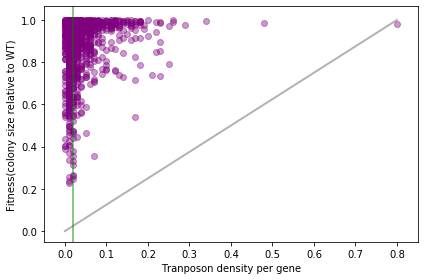

In [10]:
plt.scatter(transpos_select,fitness_select,color='purple',alpha=0.4),
plt.plot(np.linspace(0,0.8),np.linspace(0,1),linewidth=2,color='gray',alpha=0.6)
plt.axvline(0.02,color='green',alpha=0.6)

plt.xlabel('Tranposon density per gene')
plt.ylabel('Fitness(colony size relative to WT)')
plt.tight_layout()
plt.savefig('fitness-vs-transposon-density-benoit-data.png',dpi=300,format='png',transparent=False)